<h1><center>Lab 2 - A2</center></h1>

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
$$ \text{maximise } \sum_{i=n}^n v_i x_i $$
$$ \text{subject to } \sum_{i=n}^n v=w_i x_i \leq W  $$
- $x_i=1$ means object $i$ is selected
- $x_i=0$ means object $j$ is not selected


# Knapsack problem: prerequisites
Helper functions for knapsack solution generation and evaluation

In [3]:
# Data loading function

def load_data(file_name):
  '''
    Loads data for the knapsack problem from a file
    Input:
      - file_name: str
    Output:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
  '''
  weights_and_values = []
  with open(file_name) as f:
    # first number = number of records
    size = (int)(f.readline().strip())
    # read index, value, weight for all records
    for i in range(size):
      info = f.readline().strip().split()
      index, value, weight = (int)(info[0]), (int)(info[1]), (int)(info[2])
      weights_and_values.append((weight, value))
    # last number = maximum weight
    max_weight = (int)(f.readline().strip())
  return size, weights_and_values, max_weight

In [1]:
# Knapsack solution evaluation functions

def knapsack_weight(n, weights_and_values, configuration):
  '''
    Returns the total weight of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - weight: int
  '''
  weight = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      weight += curr_weight
  return weight

def knapsack_value(n, weights_and_values, configuration):
  '''
    Returns the total value of the knapsack for a certain configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - value: int
  '''
  value = 0
  for i in range(n):
    if configuration[i] == 1:
      curr_weight, curr_value = weights_and_values[i]
      value += curr_value
  return value

def knapsack_is_valid(n, weights_and_values, configuration, max_weight):
  '''
    Checks if a certain knapsack configuration is a valid solution
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
      - max_weight: int
    Output:
      - bool
  '''
  weight = knapsack_weight(n, weights_and_values, configuration)
  return weight <= max_weight

def knapsack_fitness(n, weights_and_values, configuration, max_weight):
  '''
    Returns the total value of the knapsack for a certain configuration if it is valid
      or -1 if it is not valid
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - configuration: list[{0,1}] -> size = n
    Output:
      - fitness: int
  '''
  if not knapsack_is_valid(n, weights_and_values, configuration, max_weight):
    return -1
  return knapsack_value(n, weights_and_values, configuration)

In [2]:
# Random knapsack solutions generation functions

def generate_random_configuration(n):
  '''
    Generate a random binary list of size n
    Input:
      - n: int
    Output:
      - list[{0,1}] -> size = n
  '''
  return np.random.randint(2, size=n).tolist()

def generate_random_knapsack(n, weights_and_values, max_weight):
  '''
    Generates a random knapsack configuration and computes its weight, value and fitness
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  configuration = generate_random_configuration(n)
  weight = knapsack_weight(n, weights_and_values, configuration)
  value = knapsack_value(n, weights_and_values, configuration)
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  return configuration, weight, value, fitness

def generate_random_valid_knapsack(n, weights_and_values, max_weight):
  '''
    Generates random knapsack configurations until it finds a valid one
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - configuration: list[{0,1}] -> size = n
      - weight: int
      - value: int
      - fitness: int
  '''
  while True:
    configuration, weight, value, fitness = generate_random_knapsack(n, weights_and_values, max_weight)
    if fitness > 0:
      break
  return configuration, weight, value, fitness

In [53]:
# Display functions

def print_knapsack_solution(n, weights_and_values, max_weight, configuration):
  '''
    Prints a solution of a given knapsack problem
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
      - configuration: list[{0,1}] -> size = n
    Output: None
  '''
  weight = knapsack_weight(n, weights_and_values, configuration)
  value = knapsack_value(n, weights_and_values, configuration)
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  print(f"Solution for knapsack problem of size {n} with max weight {max_weight}:")
  print(f"Configuration: {configuration}")
  print(f"Weight: {weight}; Value: {value}")
  print(f"Fitness: {fitness}")

def lists_to_markdown_table(header, *lists):
  '''
    Returns a string formatted like a markdown table which contains data from the header and the lists
    Input:
      - header: string
      - *lists: varying number of list[] -> size = n
    Output:
      - markdown_table: string
  '''
  markdown_table = header
  n = len(lists[0])
  for i in range(n):
    markdown_table += "|"
    for list in lists:
      markdown_table += f" {list[i]} |"
    markdown_table += "\n"
  return markdown_table

# Random hill climbing algorithm
1. Choose a random binary configuration of size n. Call this string best−evaluated.
2. Choose a locus at random to flip. If the flip leads to an equal or higher fitness, then set best−evaluated to the resulting string.
3. Go to step 2 until an optimum string has been found or until a maximum number of evaluations have been performed.
3. Return the current value of best−evaluated.

## Implementation

In [11]:
# Helper functions to RHC for the knapsack problem

def generate_random_flip(n, configuration):
  '''
    Generates a new configuration by flipping a random bit
    Input:
      - configuration: list[{0,1}] -> size = n
    Output:
      - new_configuration: list[{0,1}] -> size = n
  '''
  new_configuration = configuration[:]
  # choose a random position
  flip_position = np.random.randint(n)
  # flip bit at position
  if new_configuration[flip_position] == 0:
    new_configuration[flip_position] = 1
  else:
    new_configuration[flip_position] = 0
  # return new list
  return new_configuration

In [44]:
# Random hill climbing algorithm for solving the knapsack problem

def knapsack_RHC(max_evaluations, n, weights_and_values, max_weight):
  '''
    Implements a random hill climbing algorithm for the knapsack problem
    Checks for improvements by flipping bits in the configuration
    If after max_evaluation steps no improvement has been found, 
      the algorithm is terminated and the configuration for the local maximum is returned
    Input:
      - max_evaluations: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - best_evaluated: list[{0,1}]
  '''
  # initialize best configuration and best fitness
  best_evaluated = generate_random_configuration(n)
  best_fitness = knapsack_fitness(n, weights_and_values, best_evaluated, max_weight)
  # run loop
  count = 0
  while count < max_evaluations:
    # generate random filp
    new_evaluated = generate_random_flip(n, best_evaluated)
    new_fitness = knapsack_fitness(n, weights_and_values, new_evaluated, max_weight)
    # check for fitness improvement
    if new_fitness >= best_fitness:
      best_fitness = new_fitness
      best_evaluated = new_evaluated
      # reset count if a new point has been found
      count = 0
    else:
      # increment count if no improvement has been found
      count += 1
  return best_evaluated

def knapsack_RHC_m_times(m, max_evaluations, n, weights_and_values, max_weight):
  '''
    Runs the random hill climbing algorithm for the knapsack problem m times and returns the best solutions found
    Input:
      - m: int
      - max_evaluations: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - best_solutions: list[list[{0,1}]]
  '''
  best_solutions = []
  for step in range(m):
    best_evaluated = knapsack_RHC(max_evaluations, n, weights_and_values, max_weight)
    best_solutions.append(best_evaluated)
  return best_solutions

## Testing

In [43]:
# Testing the random hill climbing algorithm for n = 20 and different values of max_evaluations

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

max_evaluations = 1000
start_time = time.time()
configuration = knapsack_RHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

max_evaluations = 10000
start_time = time.time()
configuration = knapsack_RHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

Maximum number of evaluations: 1000

Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
Weight: 524; Value: 564
Fitness: 564

Execution time: 0.0050737857818603516

Maximum number of evaluations: 10000

Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Weight: 524; Value: 632
Fitness: 632

Execution time: 0.05028581619262695



In [31]:
# Testing the random hill climbing algorithm for n = 200 and different values of max_evaluations

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

max_evaluations = 1000
start_time = time.time()
configuration = knapsack_RHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

max_evaluations = 50000
start_time = time.time()
configuration = knapsack_RHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

Maximum number of evaluations: 1000

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Weight: 112631; Value: 131731
Fitness: 131731

Execution time: 0.018309593200683594

Maximum number of evaluations: 50000

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0

## Analysis

### Quality and variability of results

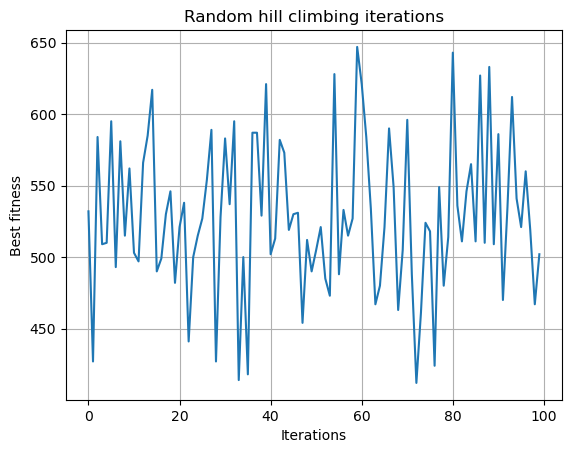

In [78]:
# Testing variability of RHC algorithm for same data on multiple iterations

# n = 20
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")
max_evaluations = 20

# test RHC on 100 iterations
iterations = 100

best_solutions = knapsack_RHC_m_times(iterations, max_evaluations, n, weights_and_values, max_weight)
best_fitnesses = [knapsack_fitness(n, weights_and_values, configuration, max_weight) for configuration in best_solutions]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Random hill climbing iterations")
plt.show()

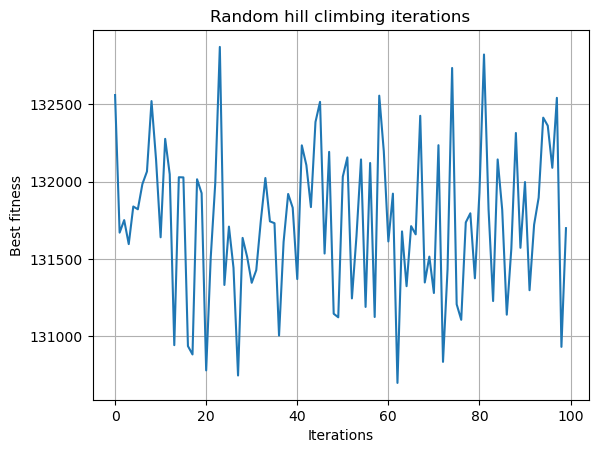

In [80]:
# Testing variability of RHC algorithm for same data on multiple iterations

# n = 200
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")
max_evaluations = 200

# test RHC on 100 iterations
iterations = 100

best_solutions = knapsack_RHC_m_times(iterations, max_evaluations, n, weights_and_values, max_weight)
best_fitnesses = [knapsack_fitness(n, weights_and_values, configuration, max_weight) for configuration in best_solutions]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Random hill climbing iterations")
plt.show()

- From the data we can see that the random hill climbing algorithm has **high variability** when it comes to finding the optimal solution.
  
- Moreover, in the first example we can see 7 observations where the maximum value found does not exceed 450 fitness, possibly indicating **low solution quality**.
  
- This stems from the fact that the algorithm only considers points in the neighbourhood of the first random point chosen, and thus may get stuck on local maxima.

### Performance-cost analysis

In [83]:
# Analysing the cost and the performance of the RHC algorithm for different values of max_evaluations

# n = 200
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

m_values = [int(k) for k in np.linspace(20, 200, 19)] # maximum number of evaluations
n_values = [n for _ in range(len(m_values))]

average_best_fitnesses = []
average_execution_times = []

iterations = 100

# for each m value, run 100 iterations of the algorithm
# and record the average fitness and the average execution time
for m in m_values:
  best_fitnesses = []
  execution_times = []
  # calculate fitness and time for a number of iterations
  for iteration in range(iterations):
    start_time = time.time()
    best_evaluated = knapsack_RHC(m, n, weights_and_values, max_weight)
    end_time = time.time()
    best_fitnesses.append(knapsack_fitness(n, weights_and_values, best_evaluated, max_weight))
    execution_times.append(end_time - start_time)
  # store the average values
  average_best_fitnesses.append(np.average(best_fitnesses))
  average_execution_times.append(np.average(execution_times))

header = "| n | Max. iterations | Average best fitness | Average execution time (seconds) |\n"
header += "|---|---|---|---| \n"
markdown_table = lists_to_markdown_table(header, n_values, m_values, average_best_fitnesses, average_execution_times)

print(markdown_table)

| n | Max. iterations | Average best fitness | Average execution time (seconds) |
|---|---|---|---| 
| 200 | 20 | 131626.22 | 0.0015587878227233886 |
| 200 | 30 | 131759.25 | 0.0019344139099121095 |
| 200 | 40 | 131726.69 | 0.0020359468460083006 |
| 200 | 50 | 131691.91 | 0.0021401166915893553 |
| 200 | 60 | 131744.28 | 0.0030180001258850097 |
| 200 | 70 | 131781.06 | 0.003991622924804688 |
| 200 | 80 | 131728.9 | 0.003798396587371826 |
| 200 | 90 | 131876.53 | 0.004933323860168457 |
| 200 | 100 | 131751.38 | 0.00420358419418335 |
| 200 | 110 | 131955.43 | 0.003523421287536621 |
| 200 | 120 | 131799.12 | 0.00490189790725708 |
| 200 | 130 | 131760.09 | 0.004878864288330078 |
| 200 | 140 | 131774.45 | 0.005136396884918213 |
| 200 | 150 | 131770.14 | 0.004662806987762451 |
| 200 | 160 | 131847.12 | 0.004203944206237793 |
| 200 | 170 | 131874.2 | 0.005402023792266846 |
| 200 | 180 | 131868.28 | 0.005852627754211426 |
| 200 | 190 | 131913.09 | 0.005818088054656983 |
| 200 | 200 | 131913.3 |

| n | Max. iterations | Average best fitness | Average execution time (seconds) |
|---|---|---|---| 
| 200 | 20 | 131626.22 | 0.0015587878227233886 |
| 200 | 30 | 131759.25 | 0.0019344139099121095 |
| 200 | 40 | 131726.69 | 0.0020359468460083006 |
| 200 | 50 | 131691.91 | 0.0021401166915893553 |
| 200 | 60 | 131744.28 | 0.0030180001258850097 |
| 200 | 70 | 131781.06 | 0.003991622924804688 |
| 200 | 80 | 131728.9 | 0.003798396587371826 |
| 200 | 90 | 131876.53 | 0.004933323860168457 |
| 200 | 100 | 131751.38 | 0.00420358419418335 |
| 200 | 110 | 131955.43 | 0.003523421287536621 |
| 200 | 120 | 131799.12 | 0.00490189790725708 |
| 200 | 130 | 131760.09 | 0.004878864288330078 |
| 200 | 140 | 131774.45 | 0.005136396884918213 |
| 200 | 150 | 131770.14 | 0.004662806987762451 |
| 200 | 160 | 131847.12 | 0.004203944206237793 |
| 200 | 170 | 131874.2 | 0.005402023792266846 |
| 200 | 180 | 131868.28 | 0.005852627754211426 |
| 200 | 190 | 131913.09 | 0.005818088054656983 |
| 200 | 200 | 131913.3 | 0.0060495734214782715 |

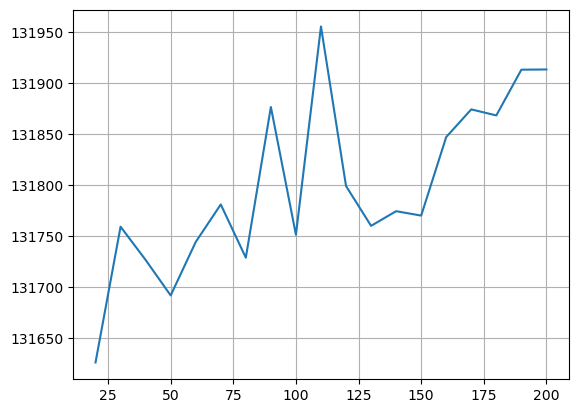

In [85]:
# plot correlation between max_evaluations number and fitness
plt.plot(m_values, average_best_fitnesses)
plt.grid()
plt.show()

In [86]:
m_values = [100, 200, 500, 1000, 2000] # maximum number of evaluations
n_values = [n for _ in range(len(m_values))]

average_best_fitnesses = []
average_execution_times = []

iterations = 100

# for each m value, run 100 iterations of the algorithm
# and record the average fitness and the average execution time
for m in m_values:
  best_fitnesses = []
  execution_times = []
  # calculate fitness and time for a number of iterations
  for iteration in range(iterations):
    start_time = time.time()
    best_evaluated = knapsack_RHC(m, n, weights_and_values, max_weight)
    end_time = time.time()
    best_fitnesses.append(knapsack_fitness(n, weights_and_values, best_evaluated, max_weight))
    execution_times.append(end_time - start_time)
  # store the average values
  average_best_fitnesses.append(np.average(best_fitnesses))
  average_execution_times.append(np.average(execution_times))

header = "| n | Max. iterations | Average best fitness | Average execution time (seconds) |\n"
header += "|---|---|---|---| \n"
markdown_table = lists_to_markdown_table(header, n_values, m_values, average_best_fitnesses, average_execution_times)

print(markdown_table)

| n | Max. iterations | Average best fitness | Average execution time (seconds) |
|---|---|---|---| 
| 200 | 100 | 131755.66 | 0.004254355430603028 |
| 200 | 200 | 131913.23 | 0.00574021577835083 |
| 200 | 500 | 131797.57 | 0.013041529655456543 |
| 200 | 1000 | 131809.88 | 0.02298255920410156 |
| 200 | 2000 | 131818.73 | 0.04244830369949341 |



| n | Max. iterations | Average best fitness | Average execution time (seconds) |
|---|---|---|---| 
| 200 | 100 | 131755.66 | 0.004254355430603028 |
| 200 | 200 | 131913.23 | 0.00574021577835083 |
| 200 | 500 | 131797.57 | 0.013041529655456543 |
| 200 | 1000 | 131809.88 | 0.02298255920410156 |
| 200 | 2000 | 131818.73 | 0.04244830369949341 |

- From the data we can see that, generally, a higher value for max_evaluations will yield better results. However, for large enough values of max_evaluations we see significantly less improvement, at the cost of higher execution time.
  
- This confirms the limitations of the random hill climbing algorithm when it comes to finding values outside local maxima.

# Steepest Ascent Hill-Climbing
1. Choose a random binary configuration of size n. Call this string current−hilltop.
2. Going from left to right, systematically flip each bit in the string, one at a time, recording the fitnesses of the resulting one−bit mutants.
3. If any of the resulting one−bit mutants give a fitness increase, then set current−hilltop to the one−bit mutant giving the highest fitness increase. (Ties are decided at random.)
4. If there is no fitness increase, then save current−hilltop and go to step 1. Otherwise, go to step 2 with the new current−hilltop.
5. When a set number of function evaluations has been performed (here, each bit flip in step 2 is followed by a function evaluation), return the highest hilltop that was found.

## Implementation

In [87]:
# Helper functions to SAHC for the knapsack problem

def flip(configuration, flip_position):
  '''
    Flips the node found at position i in the given configuration
    Input:
      - configuration: list[{0,1}]
      - flip_position: int
    Output:
      - new_configuration: list[{0,1}]
  '''
  new_configuration = configuration[:]
  if new_configuration[flip_position] == 0:
    new_configuration[flip_position] = 1
  else:
    new_configuration[flip_position] = 0
  return new_configuration

def best_flip(n, weights_and_values, max_weight, configuration):
  '''
    Returns the one-bit mutant of the current configuration which yields the best fitness increase
      or None if there is no fitness increase starting from the current configuration
    Input:
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
      - configuration: list[{0,1}] -> size = n
    Output:
      - new_configuration: list[{0,1}] -> size = n
      / None
  '''
  new_configuration = None
  # initialize best fitness with current fitness
  best_fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  # find all mutants and calculate their fitness
  for i in range(n):
    mutant_configuration = flip(configuration, i)
    mutant_fitness = knapsack_fitness(n, weights_and_values, mutant_configuration, max_weight)
    if mutant_fitness > best_fitness:
      best_fitness = mutant_fitness
      new_configuration = mutant_configuration
  return new_configuration

In [132]:
# Steepest ascent hill climbing algorithm for solving the knapsack problem

def knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight):
  '''
    Implements a steepest ascent hill climbing algorithm for the knapsack problem
    Checks for improvements by flipping bits in the configuration and chooses the best improvement
    If from a point no more improvements are possible, choose another starting point
    After a new starting point was chosen max_evaluation times,
      the algorithm stops and the configuration for the global maximum found until that point is returned
    Input:
      - max_evaluations: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - best_configuration: list[{0,1}]
  '''
  # initialize current hilltop
  current_hilltop = generate_random_configuration(n)
  # initialize best configuration and best fitness
  best_configuration = current_hilltop
  best_fitness = knapsack_fitness(n, weights_and_values, current_hilltop, max_weight)
  # count tracks the number of times a new starting point was generated
  count = 0
  while count < max_evaluations:
    new_configuration = best_flip(n, weights_and_values, max_weight, current_hilltop)
    if new_configuration:
      # a better configuration was found
      current_hilltop = new_configuration
    else:
      # save current values if they improve global maximum
      current_fitness = knapsack_fitness(n, weights_and_values, current_hilltop, max_weight)
      if current_fitness > best_fitness:
        # update best fitness and best configuration
        best_fitness = current_fitness
        best_configuration = current_hilltop
      # no improvements possible, choose new strating point
      count += 1
      current_hilltop = generate_random_configuration(n)
  return best_configuration

def knapsack_SAHC_m_times(m, max_evaluations, n, weights_and_values, max_weight):
  '''
    Runs the steepest ascent hill climbing algorithm for the knapsack problem m times and returns the best solutions found
    Input:
      - m: int
      - max_evaluations: int
      - n: int
      - weights_and_values: list[tuple[int, int]]
      - max_weight: int
    Output:
      - best_solutions: list[list[{0,1}]]
  '''
  best_solutions = []
  for step in range(m):
    best_evaluated = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
    best_solutions.append(best_evaluated)
  return best_solutions


## Testing

In [134]:
# Testing the steepest ascent hill climbing algorithm for n = 20 and different values of max_evaluations

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

max_evaluations = 10
start_time = time.time()
configuration = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

max_evaluations = 100
start_time = time.time()
configuration = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}")

Maximum number of evaluations: 10

Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Weight: 505; Value: 686
Fitness: 686

Execution time: 0.0013446807861328125

Maximum number of evaluations: 100

Solution for knapsack problem of size 20 with max weight 524:
Configuration: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
Weight: 522; Value: 710
Fitness: 710

Execution time: 0.015341043472290039


In [101]:
# Testing the steepest ascent hill climbing algorithm for n = 200 and different values of max_evaluations

n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

max_evaluations = 10
start_time = time.time()
configuration = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}\n")

max_evaluations = 100
start_time = time.time()
configuration = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
end_time = time.time()

print(f"Maximum number of evaluations: {max_evaluations}\n")
print_knapsack_solution(n, weights_and_values, max_weight, configuration)
print(f"\nExecution time: {end_time - start_time}")

Maximum number of evaluations: 10

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
Weight: 112622; Value: 131922
Fitness: 131922

Execution time: 0.11501741409301758

Maximum number of evaluations: 100

Solution for knapsack problem of size 200 with max weight 112648:
Configuration: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 

## Analysis

### Quality and variability of results

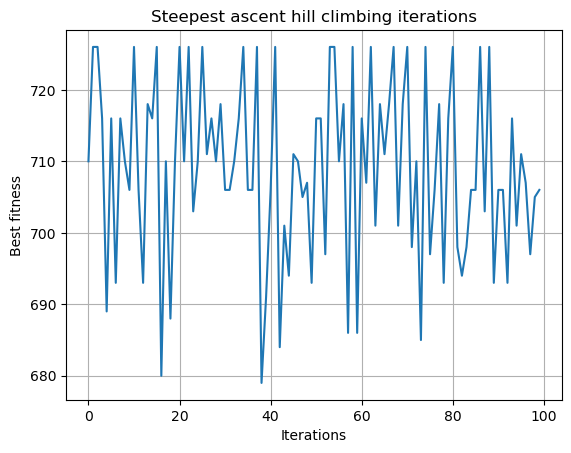

In [103]:
# Testing variability of SAHC algorithm for same data on multiple iterations

# n = 20
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")
max_evaluations = 100

# test SAHC on 100 iterations
iterations = 100

best_solutions = knapsack_SAHC_m_times(iterations, max_evaluations, n, weights_and_values, max_weight)
best_fitnesses = [knapsack_fitness(n, weights_and_values, configuration, max_weight) for configuration in best_solutions]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Steepest ascent hill climbing iterations")
plt.show()

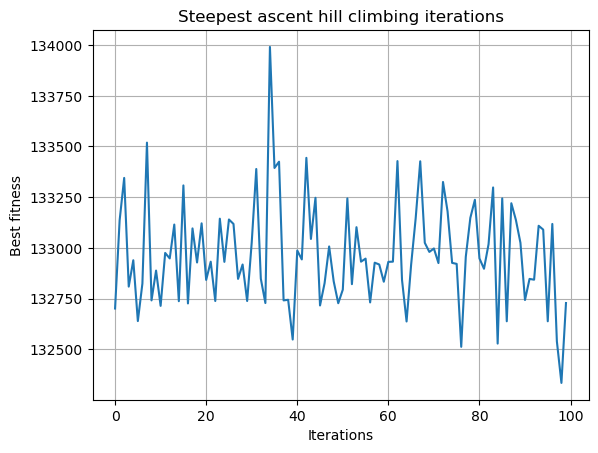

In [104]:
# Testing variability of SAHC algorithm for same data on multiple iterations

# n = 200
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")
max_evaluations = 100

# test SAHC on 100 iterations
iterations = 100

best_solutions = knapsack_SAHC_m_times(iterations, max_evaluations, n, weights_and_values, max_weight)
best_fitnesses = [knapsack_fitness(n, weights_and_values, configuration, max_weight) for configuration in best_solutions]

# plot data
plt.plot(best_fitnesses)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Best fitness")
plt.title("Steepest ascent hill climbing iterations")
plt.show()

- From the data we can see that the steepest ascent hill climbing algorithm gives much **higher quality results** than the random hill climbing algorithm.
  
- In general, we can see significantly **higher best fitness** and the results have **lower variance**.
  
- This result can be attributed to the ability of the algorithm to choose new starting points after hitting local optima, which results in a larger area of the domain being explored.

### Performance-cost analysis

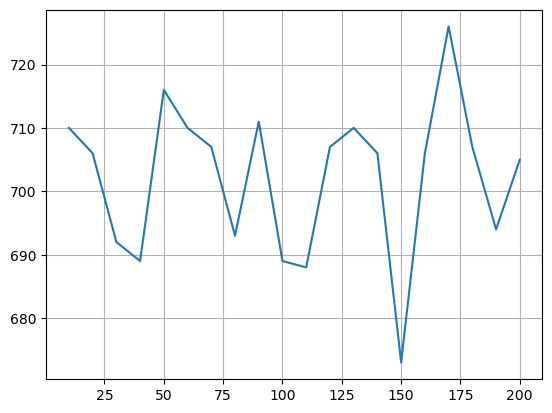

In [115]:
# Analysing the cost and the performance of the SAHC algorithm for different values of max_evaluations

# n = 20
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/knapsack-20.txt")

m_values = [int(k) for k in np.linspace(10, 200, 20)] # maximum number of evaluations
n_values = [n for _ in range(len(m_values))]

best_fitnesses = []
execution_times = []

# for each m value, run the algorithm and record the fitness and the execution time
for m in m_values:
  # calculate fitness and time
  start_time = time.time()
  configuration = knapsack_SAHC(max_evaluations, n, weights_and_values, max_weight)
  end_time = time.time()
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  # store values
  best_fitnesses.append(fitness)
  execution_times.append(end_time - start_time)

# plot correlation between max_evaluations number and fitness
plt.plot(m_values, best_fitnesses)
plt.grid()
plt.show()

In [135]:
# Analysing the cost and the performance of the SAHC algorithm for different values of max_evaluations

# n = 200
n, weights_and_values, max_weight = load_data("C:/Users/Elena/OneDrive - Universitatea Babeş-Bolyai/AI UBB - Semester 4/Metaheuristics/Labs/lab1/input_files/rucsac-200.txt")

m_values = [1, 2, 5, 10, 20, 50, 100, 1000] # maximum number of evaluations
n_values = [n for _ in range(len(m_values))]

best_fitnesses = []
execution_times = []

# for each m value, run the algorithm and record the fitness and the execution time
for m in m_values:
  # calculate fitness and time
  start_time = time.time()
  configuration = knapsack_SAHC(m, n, weights_and_values, max_weight)
  end_time = time.time()
  fitness = knapsack_fitness(n, weights_and_values, configuration, max_weight)
  # store values
  best_fitnesses.append(fitness)
  execution_times.append(end_time - start_time)

header = "| n | Max. evaluations | Best fitness | Execution time (seconds) |\n"
header += "|---|---|---|---| \n"
markdown_table = lists_to_markdown_table(header, n_values, m_values, best_fitnesses, execution_times)

print(markdown_table)

| n | Max. evaluations | Best fitness | Execution time (seconds) |
|---|---|---|---| 
| 200 | 1 | -1 | 0.0031163692474365234 |
| 200 | 2 | -1 | 0.003986358642578125 |
| 200 | 5 | 133014 | 0.0736701488494873 |
| 200 | 10 | 131937 | 0.1477510929107666 |
| 200 | 20 | 132148 | 0.2405257225036621 |
| 200 | 50 | 133041 | 0.4536707401275635 |
| 200 | 100 | 132737 | 0.9942910671234131 |
| 200 | 1000 | 133541 | 9.624684810638428 |



| n | Max. evaluations | Best fitness | Execution time (seconds) |
|---|---|---|---| 
| 200 | 1 | -1 | 0.0031163692474365234 |
| 200 | 2 | -1 | 0.003986358642578125 |
| 200 | 5 | 133014 | 0.0736701488494873 |
| 200 | 10 | 131937 | 0.1477510929107666 |
| 200 | 20 | 132148 | 0.2405257225036621 |
| 200 | 50 | 133041 | 0.4536707401275635 |
| 200 | 100 | 132737 | 0.9942910671234131 |
| 200 | 1000 | 133541 | 9.624684810638428 |

- From the data we can see that larger values for the maximum number of evaluations increase the value of the fitness slightly.
  
- However, as the algorithm relies on finding the optimal neighbour at all steps, we can see that for larger values of n or m the computational power grows significantly. This is the drawback that comes with generating good solutions.
  
- Since the solution quality does not increase very significantly as the number of evaluations grows, we might conclude that a value for m larger than 10 might be sufficient for generating very good solutions to the knapsack problem.